# **Cancer Detection Using Machine Learning**

## **Overview**

Cancer is a group of diseases characterized by the uncontrolled growth and spread of abnormal cells. If the spread is not controlled, it can result in death. There are many types of cancer, including breast cancer, lung cancer, skin cancer, and others. Early detection of cancer significantly increases the chances of successful treatment and survival. Modern medical research emphasizes the use of advanced technologies, such as machine learning, to aid in the early detection and diagnosis of cancer.

## **Business Understanding**

### **Problem Statement**

Early and accurate detection of cancer is crucial for improving patient outcomes and survival rates. Traditional diagnostic methods, while effective, can be time-consuming and subject to human error. There is a need for an automated, reliable system that can assist healthcare professionals in diagnosing cancer early and accurately, reducing the rate of false negatives and false positives.

**Objective**

The primary objective of this project is to develop a machine learning model that can detect whether a patient has cancer based on diagnostic data. This model aims to assist healthcare professionals by providing a reliable tool for early cancer detection, thereby improving patient outcomes through timely and accurate diagnosis.

## **Metrics of Success**

A recall of 90% or higher is considered a success.
By achieving a recall of 90% or higher, the model effectively minimizes false negatives, ensuring that nearly all patients with cancer are detected and can receive the necessary medical attention promptly.

## **Data Understanding**

### Data Source and Context

The dataset used for this project is the Breast Cancer Wisconsin (Diagnostic) Data Set. This dataset consists of features computed from digitized images of fine needle aspirates (FNA) of breast masses. These features describe various characteristics of the cell nuclei present in the images, which are crucial for distinguishing between benign and malignant tumors.

This dataset is publicly available from multiple sources:

- UW CS FTP server: `ftp ftp.cs.wisc.edu`
- UCI Machine Learning Repository: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

### Attribute Information

The dataset comprises 32 attributes for each sample, detailed as follows:

- **ID Number**: Unique identifier for each sample.
- **Diagnosis**: Classification of the sample as either malignant (M) or benign (B).

**Features Computed for Each Cell Nucleus**:
These features are computed in three categories for each cell nucleus: mean, standard error, and worst (largest) value. Therefore, there are 30 real-valued features derived from the cell nuclei characteristics, grouped as follows:

- **Mean Features (fields 3-12)**:
  - **Radius**: Mean of distances from the center to points on the perimeter.
  - **Texture**: Standard deviation of gray-scale values.
  - **Perimeter**.
  - **Area**.
  - **Smoothness**: Local variation in radius lengths.
  - **Compactness**: \(\frac{\text{perimeter}^2}{\text{area}} - 1.0\).
  - **Concavity**: Severity of concave portions of the contour.
  - **Concave Points**: Number of concave portions of the contour.
  - **Symmetry**.
  - **Fractal Dimension**: "Coastline approximation" - 1.

- **Standard Error Features (fields 13-22)**:
  - **Radius SE**.
  - **Texture SE**.
  - **Perimeter SE**.
  - **Area SE**.
  - **Smoothness SE**.
  - **Compactness SE**.
  - **Concavity SE**.
  - **Concave Points SE**.
  - **Symmetry SE**.
  - **Fractal Dimension SE**.

- **Worst Features (fields 23-32)**:
  - **Worst Radius**.
  - **Worst Texture**.
  - **Worst Perimeter**.
  - **Worst Area**.
  - **Worst Smoothness**.
  - **Worst Compactness**.
  - **Worst Concavity**.
  - **Worst Concave Points**.
  - **Worst Symmetry**.
  - **Worst Fractal Dimension**.

### Data Characteristics

- **No Missing Values**: All feature values are recorded with four significant digits, and there are no missing attribute values in the dataset.
- **Class Distribution**: The dataset contains 569 instances, with the following distribution:
  - **Benign**: 357 instances
  - **Malignant**: 212 instances


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('Dataset/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
for col, val in missing_values.items():
    print(f"Column '{col}' has {val} missing value(s).")

Column 'Unnamed: 32' has 569 missing value(s).


Dropping unnecessary columns

`id`

Is not typically useful for modeling because they do not contribute to the prediction of the target variable (diagnosis)

Including an identifier as a feature might introduce noise or unnecessary complexity to the model.

`Unnamed: 32`

Does not contain meaningful data for analysis or modeling.

In [6]:
data = data.drop(columns=['id', 'Unnamed: 32'])
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## **Exploratory Data Analysis (EDA)**

**Data Distribution:**

What is the distribution of each feature (mean, standard error, worst) across benign and malignant tumors?

Are there any outliers in the data, especially in features like area, perimeter, or concavity?

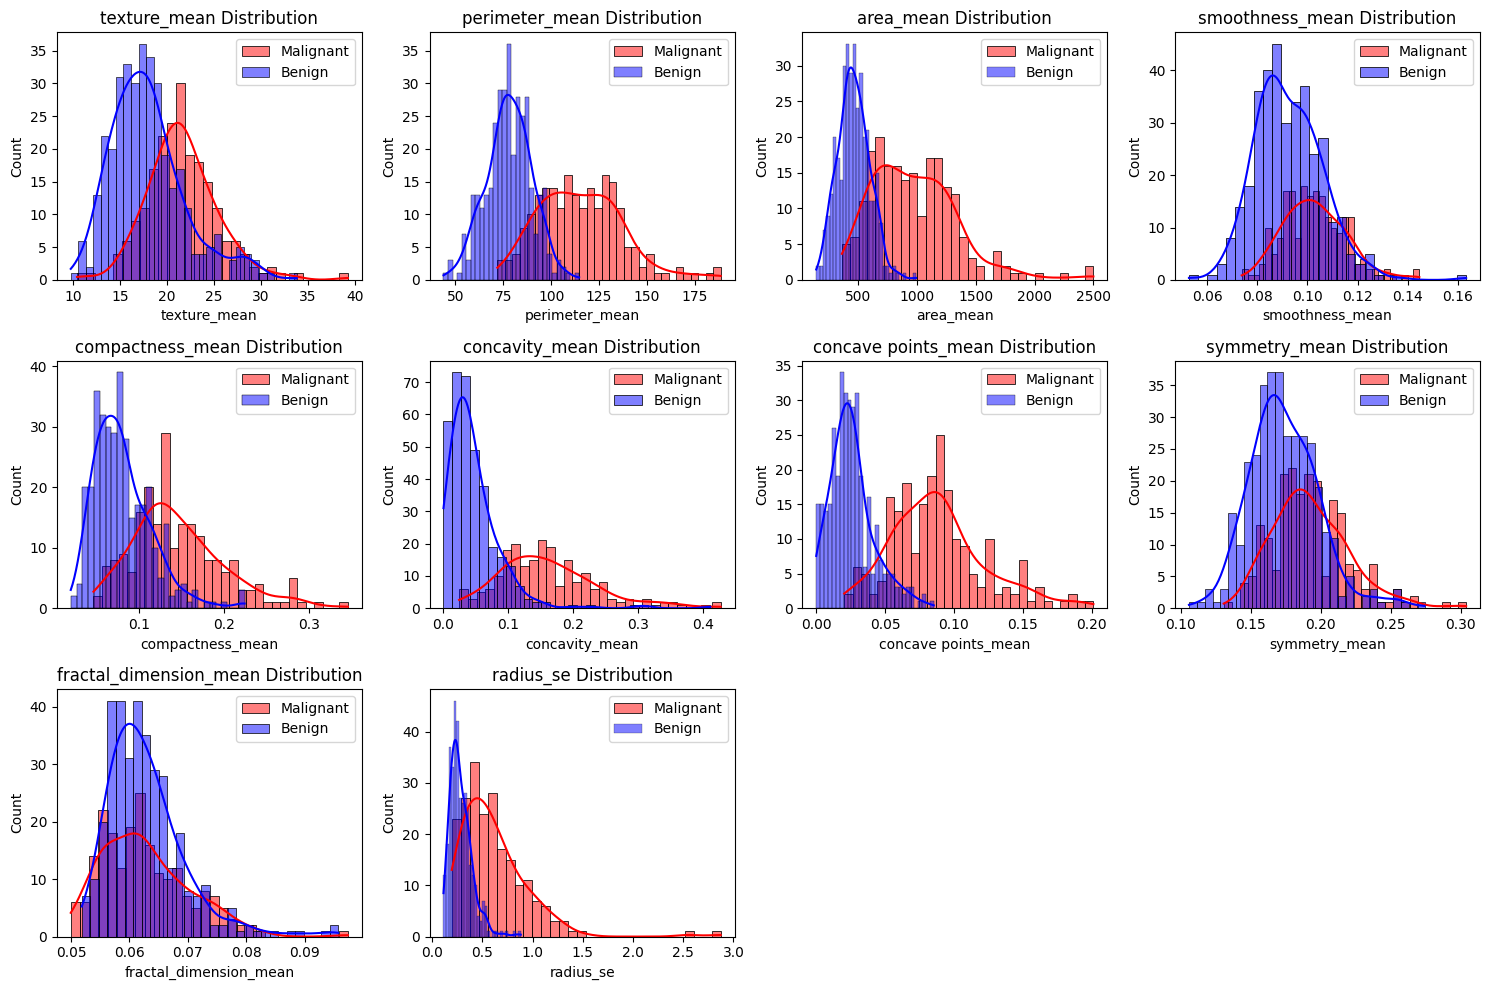

In [15]:
# Selecting columns based on categories: mean, standard error, worst
mean_features = list(data.columns[2:12])  # mean features

# Distribution of each feature across benign and malignant tumors (using histograms)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(mean_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[data['diagnosis'] == 'M'][feature], bins=30, color='red', label='Malignant', kde=True)
    sns.histplot(data[data['diagnosis'] == 'B'][feature], bins=30, color='blue', label='Benign', kde=True)
    plt.legend()
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


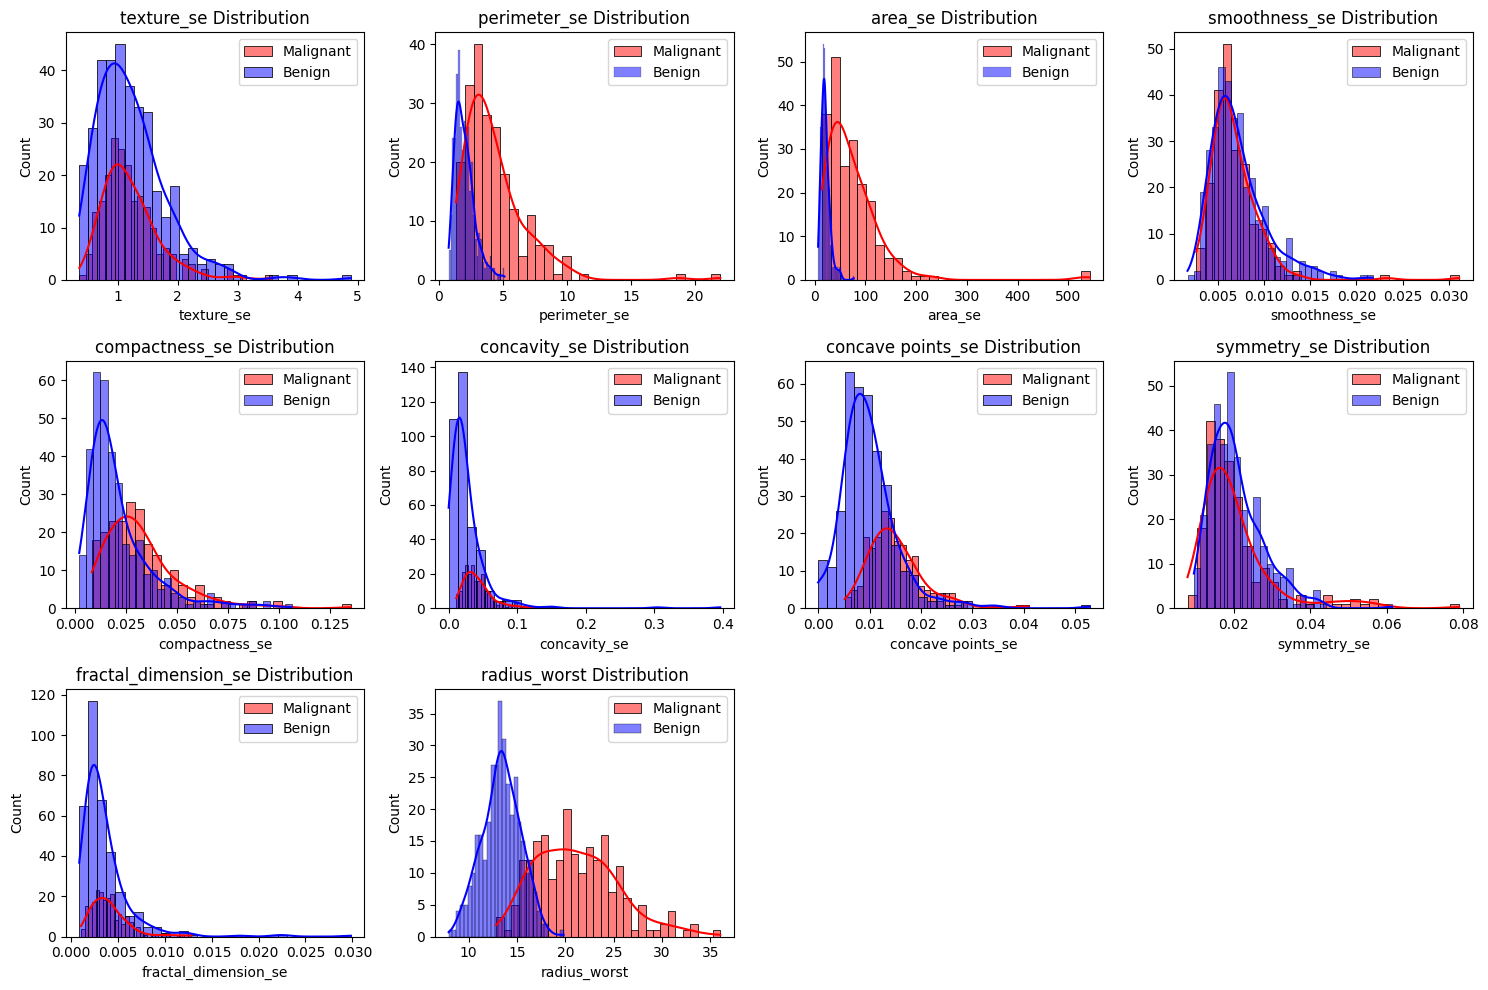

In [14]:
# Selecting standard error features
se_features = list(data.columns[12:22])

# Distribution of each standard error feature across benign and malignant tumors (using histograms)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(se_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[data['diagnosis'] == 'M'][feature], bins=30, color='red', label='Malignant', kde=True)
    sns.histplot(data[data['diagnosis'] == 'B'][feature], bins=30, color='blue', label='Benign', kde=True)
    plt.legend()
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


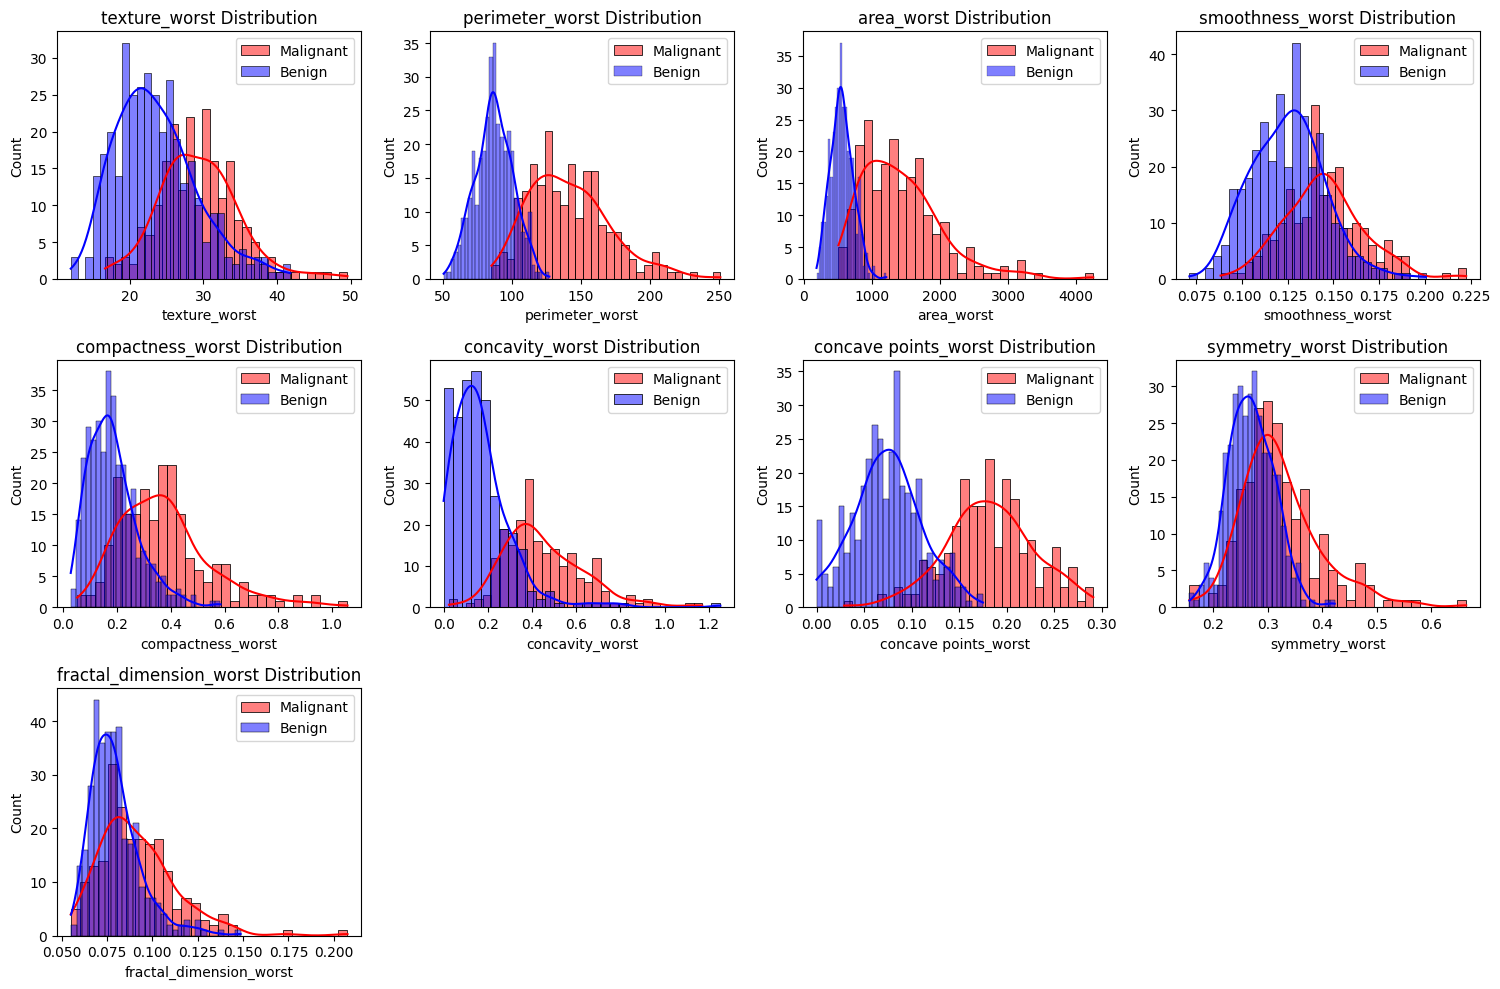

In [13]:
# Selecting worst features
worst_features = list(data.columns[22:32])

# Distribution of each worst feature across benign and malignant tumors (using histograms)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(worst_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[data['diagnosis'] == 'M'][feature], bins=30, color='red', label='Malignant', kde=True)
    sns.histplot(data[data['diagnosis'] == 'B'][feature], bins=30, color='blue', label='Benign', kde=True)
    plt.legend()
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


How do different features relate to each other? 

Are there any noticeable patterns or correlations between pairs of features?

- Red points represent malignant tumors (cancer).
- Blue points represent benign tumors (no cancer).

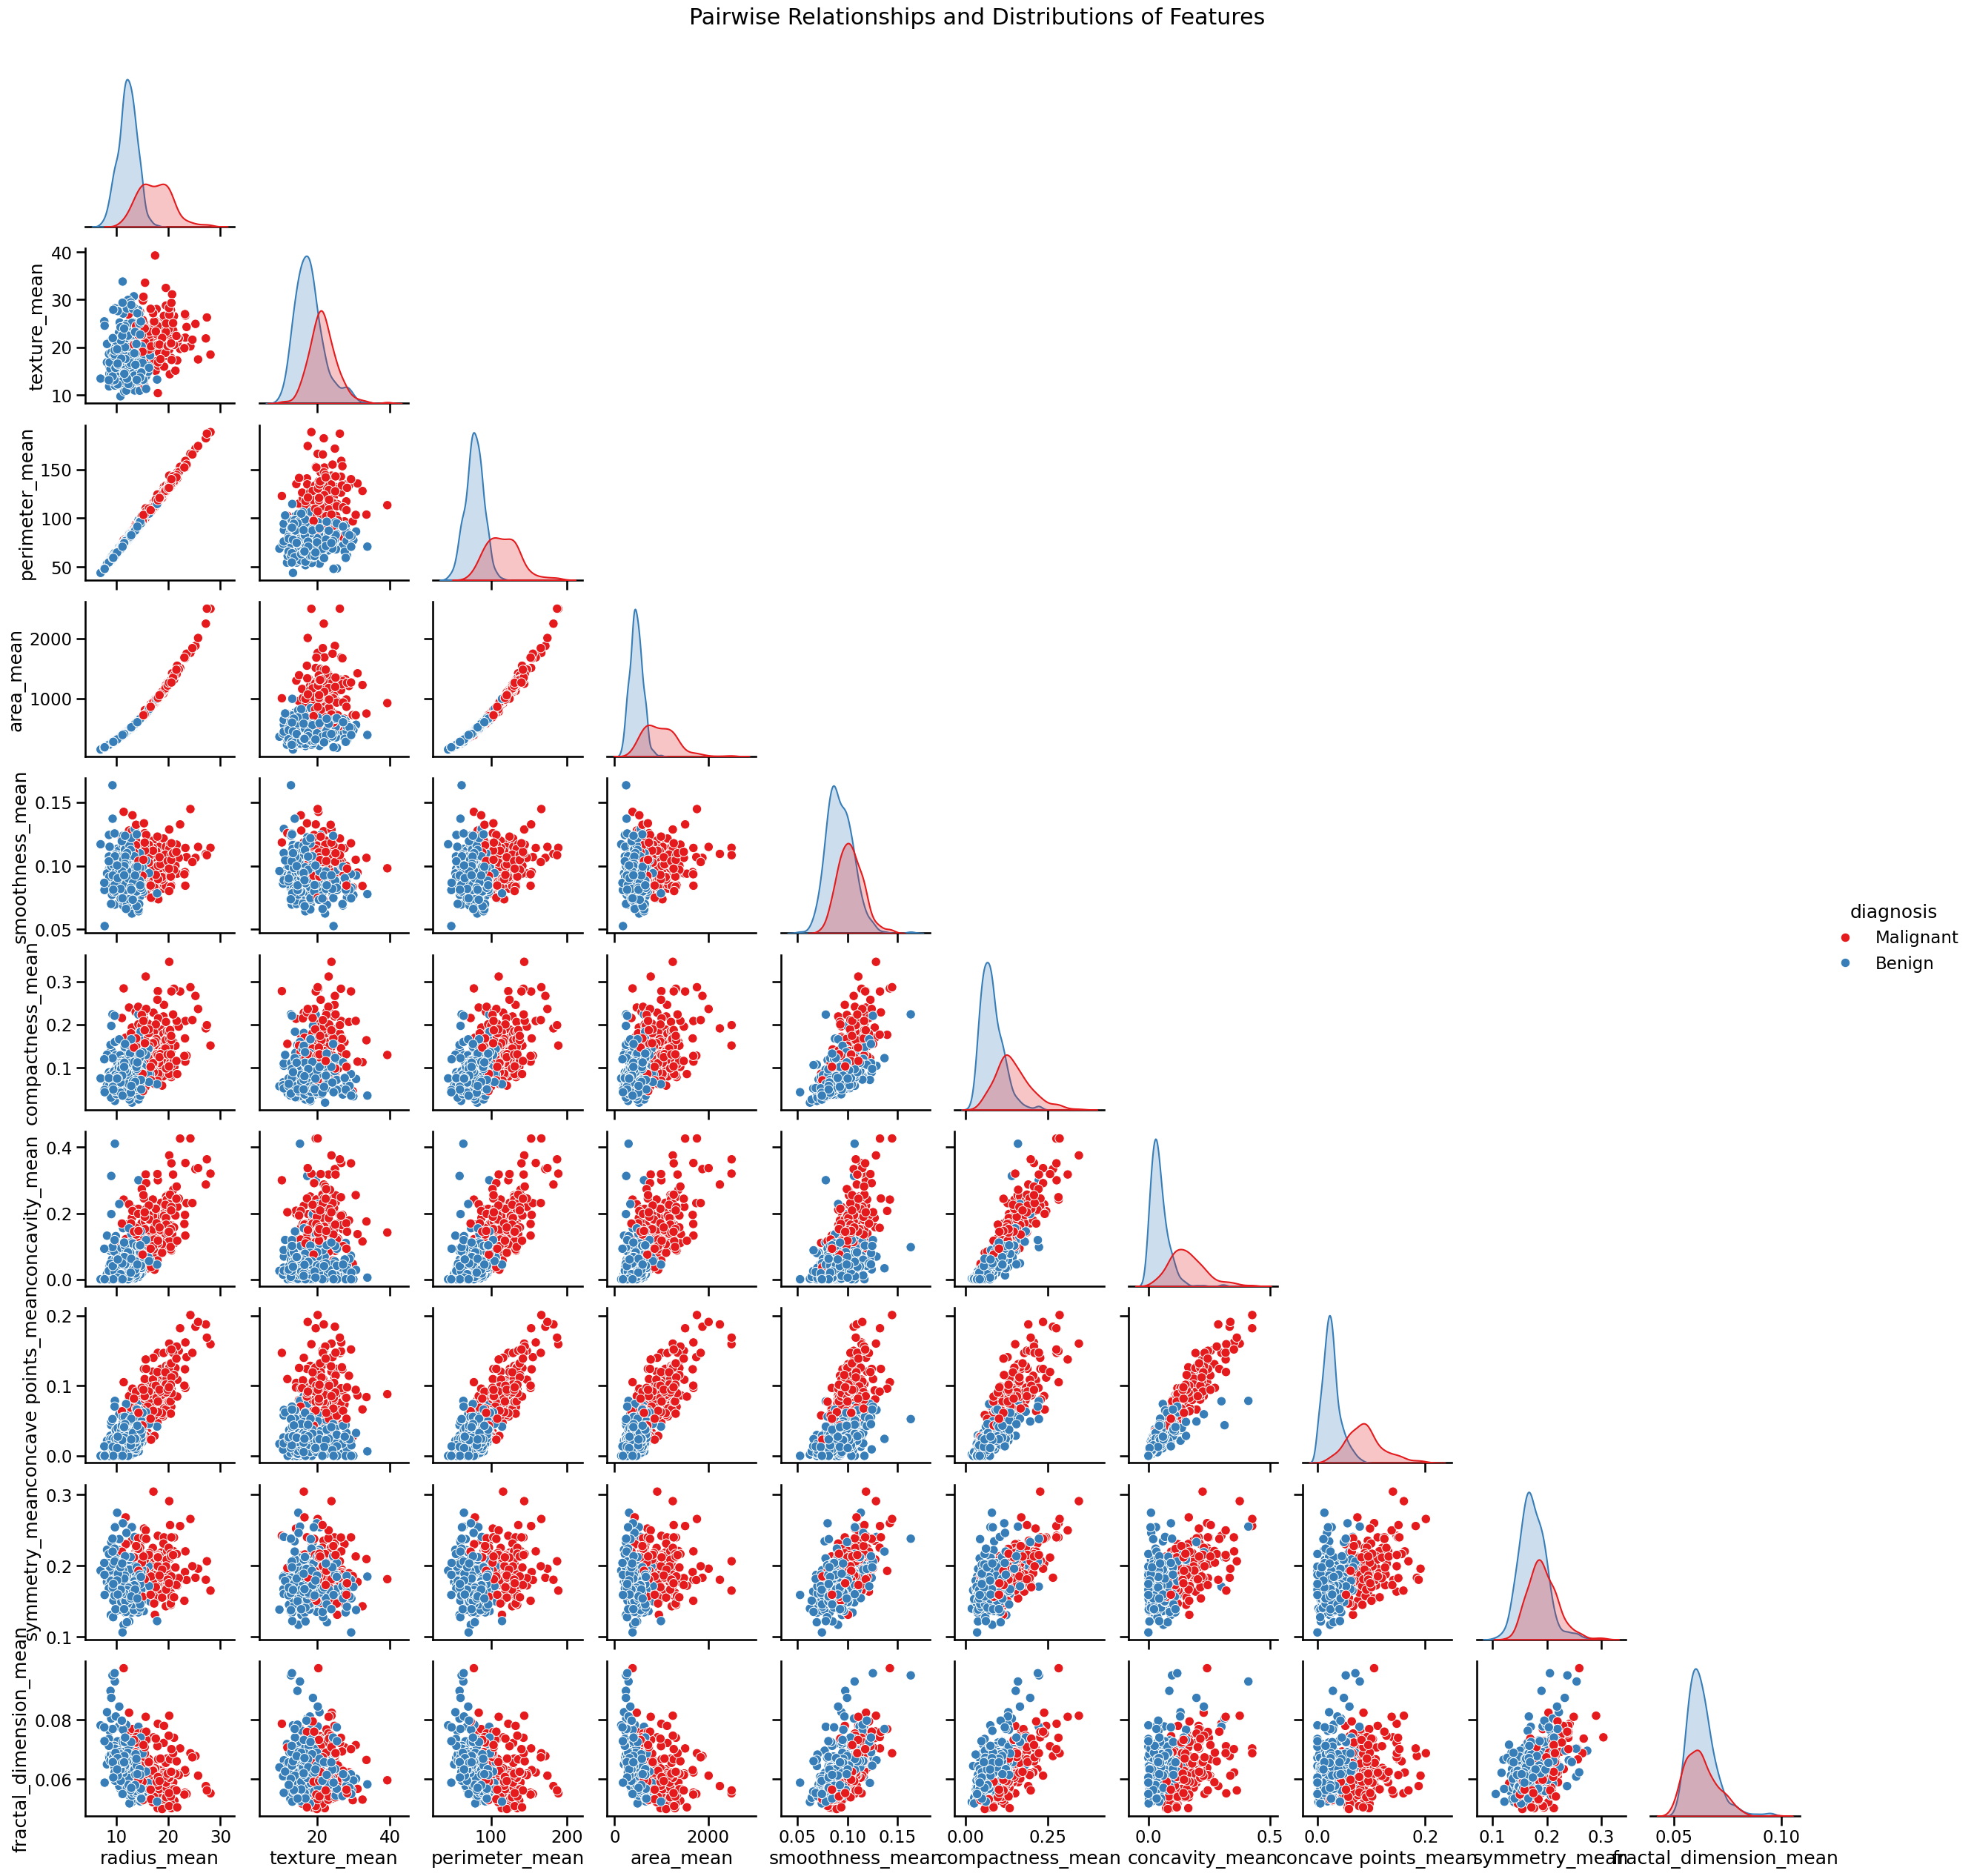

In [22]:
# Select a subset of features for pairplot
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                     'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
                     'fractal_dimension_mean', 'diagnosis']

# Set seaborn context to control the scale of plot elements
sns.set_context("talk")

# Create pairplot
sns.pairplot(data[selected_features], hue='diagnosis', palette='Set1', corner=True, diag_kind='kde')
plt.suptitle('Pairwise Relationships and Distributions of Features', y=1.02)
plt.show()

In [29]:
label_encoder = LabelEncoder()
data['diagnosis_label_encoded'] = label_encoder.fit_transform(data['diagnosis'])

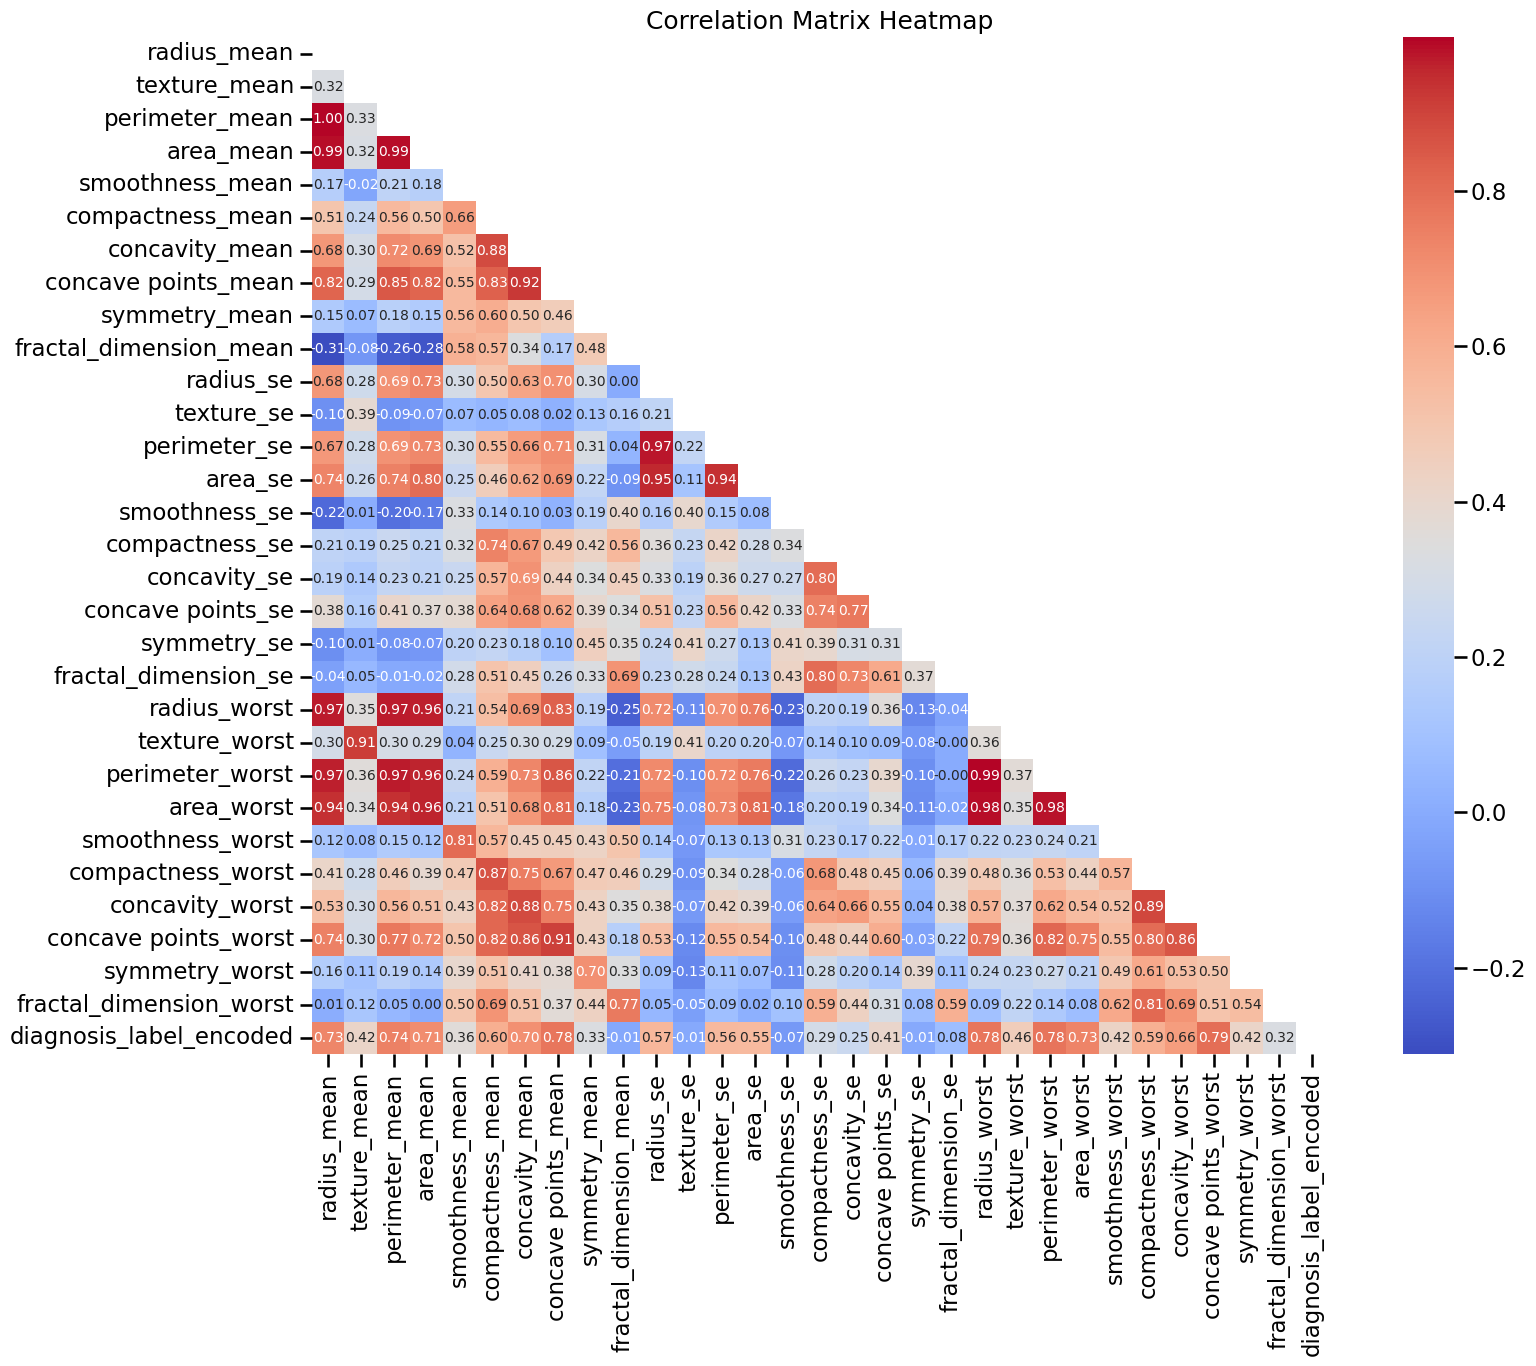

In [32]:
# Drop the original 'diagnosis' column
data_numeric = data.drop(columns=['diagnosis'])

# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))  # Increase figure size

# Plot heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, square=True, annot_kws={"size": 10})

plt.title('Correlation Matrix Heatmap', fontsize=18)  # Increase title font size
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


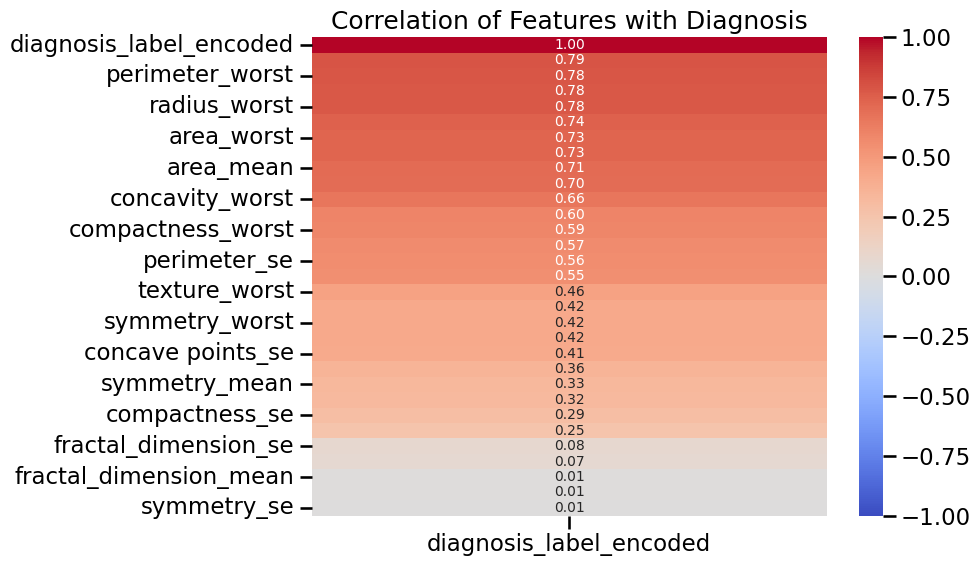

In [34]:
# Correlation with the target variable (diagnosis)
plt.figure(figsize=(10, 6))

# Sort correlation matrix by absolute values of 'diagnosis_label_encoded' column
sorted_corr = correlation_matrix[['diagnosis_label_encoded']].abs().sort_values(by='diagnosis_label_encoded', ascending=False)

# Plot heatmap of the sorted correlation matrix
sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation of Features with Diagnosis')
plt.tight_layout()
plt.show()
